# CMPE 315: Project

## Analyzing amenities in Italy

By OpenAIr 

# Data Exploration

### Upload Data from Insider AirBnB dataset from Florence, Naples, and Venice

In [88]:
import pandas as pd
import os
import missingno as msno
from tabulate import tabulate


In [89]:
data_folder = "./data"

# Define a mapping to track which sources came from where
city_map = {1: 'Florence', 2: 'Naples', 3: 'Venice'}

consolidated_data = pd.DataFrame()

# Loop through each city
for city_code in [1, 2, 3]:
    # Read the CSV file for the current city
    city_file = f"{city_map[city_code]}_Sept_2023.csv"
    city_df = pd.read_csv(os.path.join(data_folder, city_file), header=0, na_values=[''])
    # Add a 'city' column with the corresponding city name as int64 type
    city_df['city'] = city_code
    city_df['city_name'] = city_df['city'].map(city_map)

    # Append the DataFrame to the consolidated DataFrame
    consolidated_data = pd.concat([consolidated_data, city_df], ignore_index=False)




In [90]:
consolidated_data.to_csv(f'consolidated_data.csv', index=False)


In [91]:
data = pd.read_csv(f'consolidated_data.csv')

#To compare and evaulate the amenities with the review scores, both values will be needed
amenities_data = data[data['amenities'].notna()]
amenities_data = amenities_data[amenities_data['review_scores_value'].notna()]

amenities_data.info()
amenities_data.describe(include="all")


/var/folders/g6/jb0zpy7x489dnvz4_w69gxyc0000gn/T/ipykernel_2430/442266158.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'consolidated_data.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 25699 entries, 0 to 30011
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25699 non-null  int64  
 1   listing_url                                   25699 non-null  object 
 2   scrape_id                                     25699 non-null  int64  
 3   last_scraped                                  25699 non-null  object 
 4   source                                        25699 non-null  object 
 5   name                                          25699 non-null  object 
 6   description                                   25313 non-null  object 
 7   neighborhood_overview                         16246 non-null  object 
 8   picture_url                                   25699 non-null  object 
 9   host_id                                       25699 non-null  int6

id                         listing_url     scrape_id  \
count   2.569900e+04                               25699  2.569900e+04   
unique           NaN                               25699           NaN   
top              NaN  https://www.airbnb.com/rooms/31840           NaN   
freq             NaN                                   1           NaN   
mean    2.561495e+17                                 NaN  2.023091e+13   
std     3.723420e+17                                 NaN  4.411434e+06   
min     6.623000e+03                                 NaN  2.023090e+13   
25%     1.903848e+07                                 NaN  2.023090e+13   
50%     3.954072e+07                                 NaN  2.023091e+13   
75%     6.685102e+17                                 NaN  2.023091e+13   
max     9.760754e+17                                 NaN  2.023091e+13   

       last_scraped       source  \
count         25699        25699   
unique            4            2   
top      2023-09-13  city scrape   
freq          17722        23467   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                     name  \
count                                               25699   
unique                                              12292   
top     Rental unit in Florence · ★5.0 · 1 bedroom · 1...   
freq                                                  129   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description  \
count                                               25313   
unique                                              24237   
top     Rilassati in questo spazio tranquillo in posiz...   
freq                                                   99   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview  \
count                                               16246   
unique                                              13897   
top     “When you go to Naples you cry twice: when you...   
freq                                                   74   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  ...  \
count                                               25699  2.569900e+04  ...   
unique                                              25412           NaN  ...   
top     https://a0.muscache.com/pictures/miso/Hosting-...           NaN  ...   
freq                                                   20           NaN  ...   
mean                                                  NaN  1.615016e+08  ...   
std              

### Get the null values from the amentities data

Find the missing values in the dataset:

<Axes: >

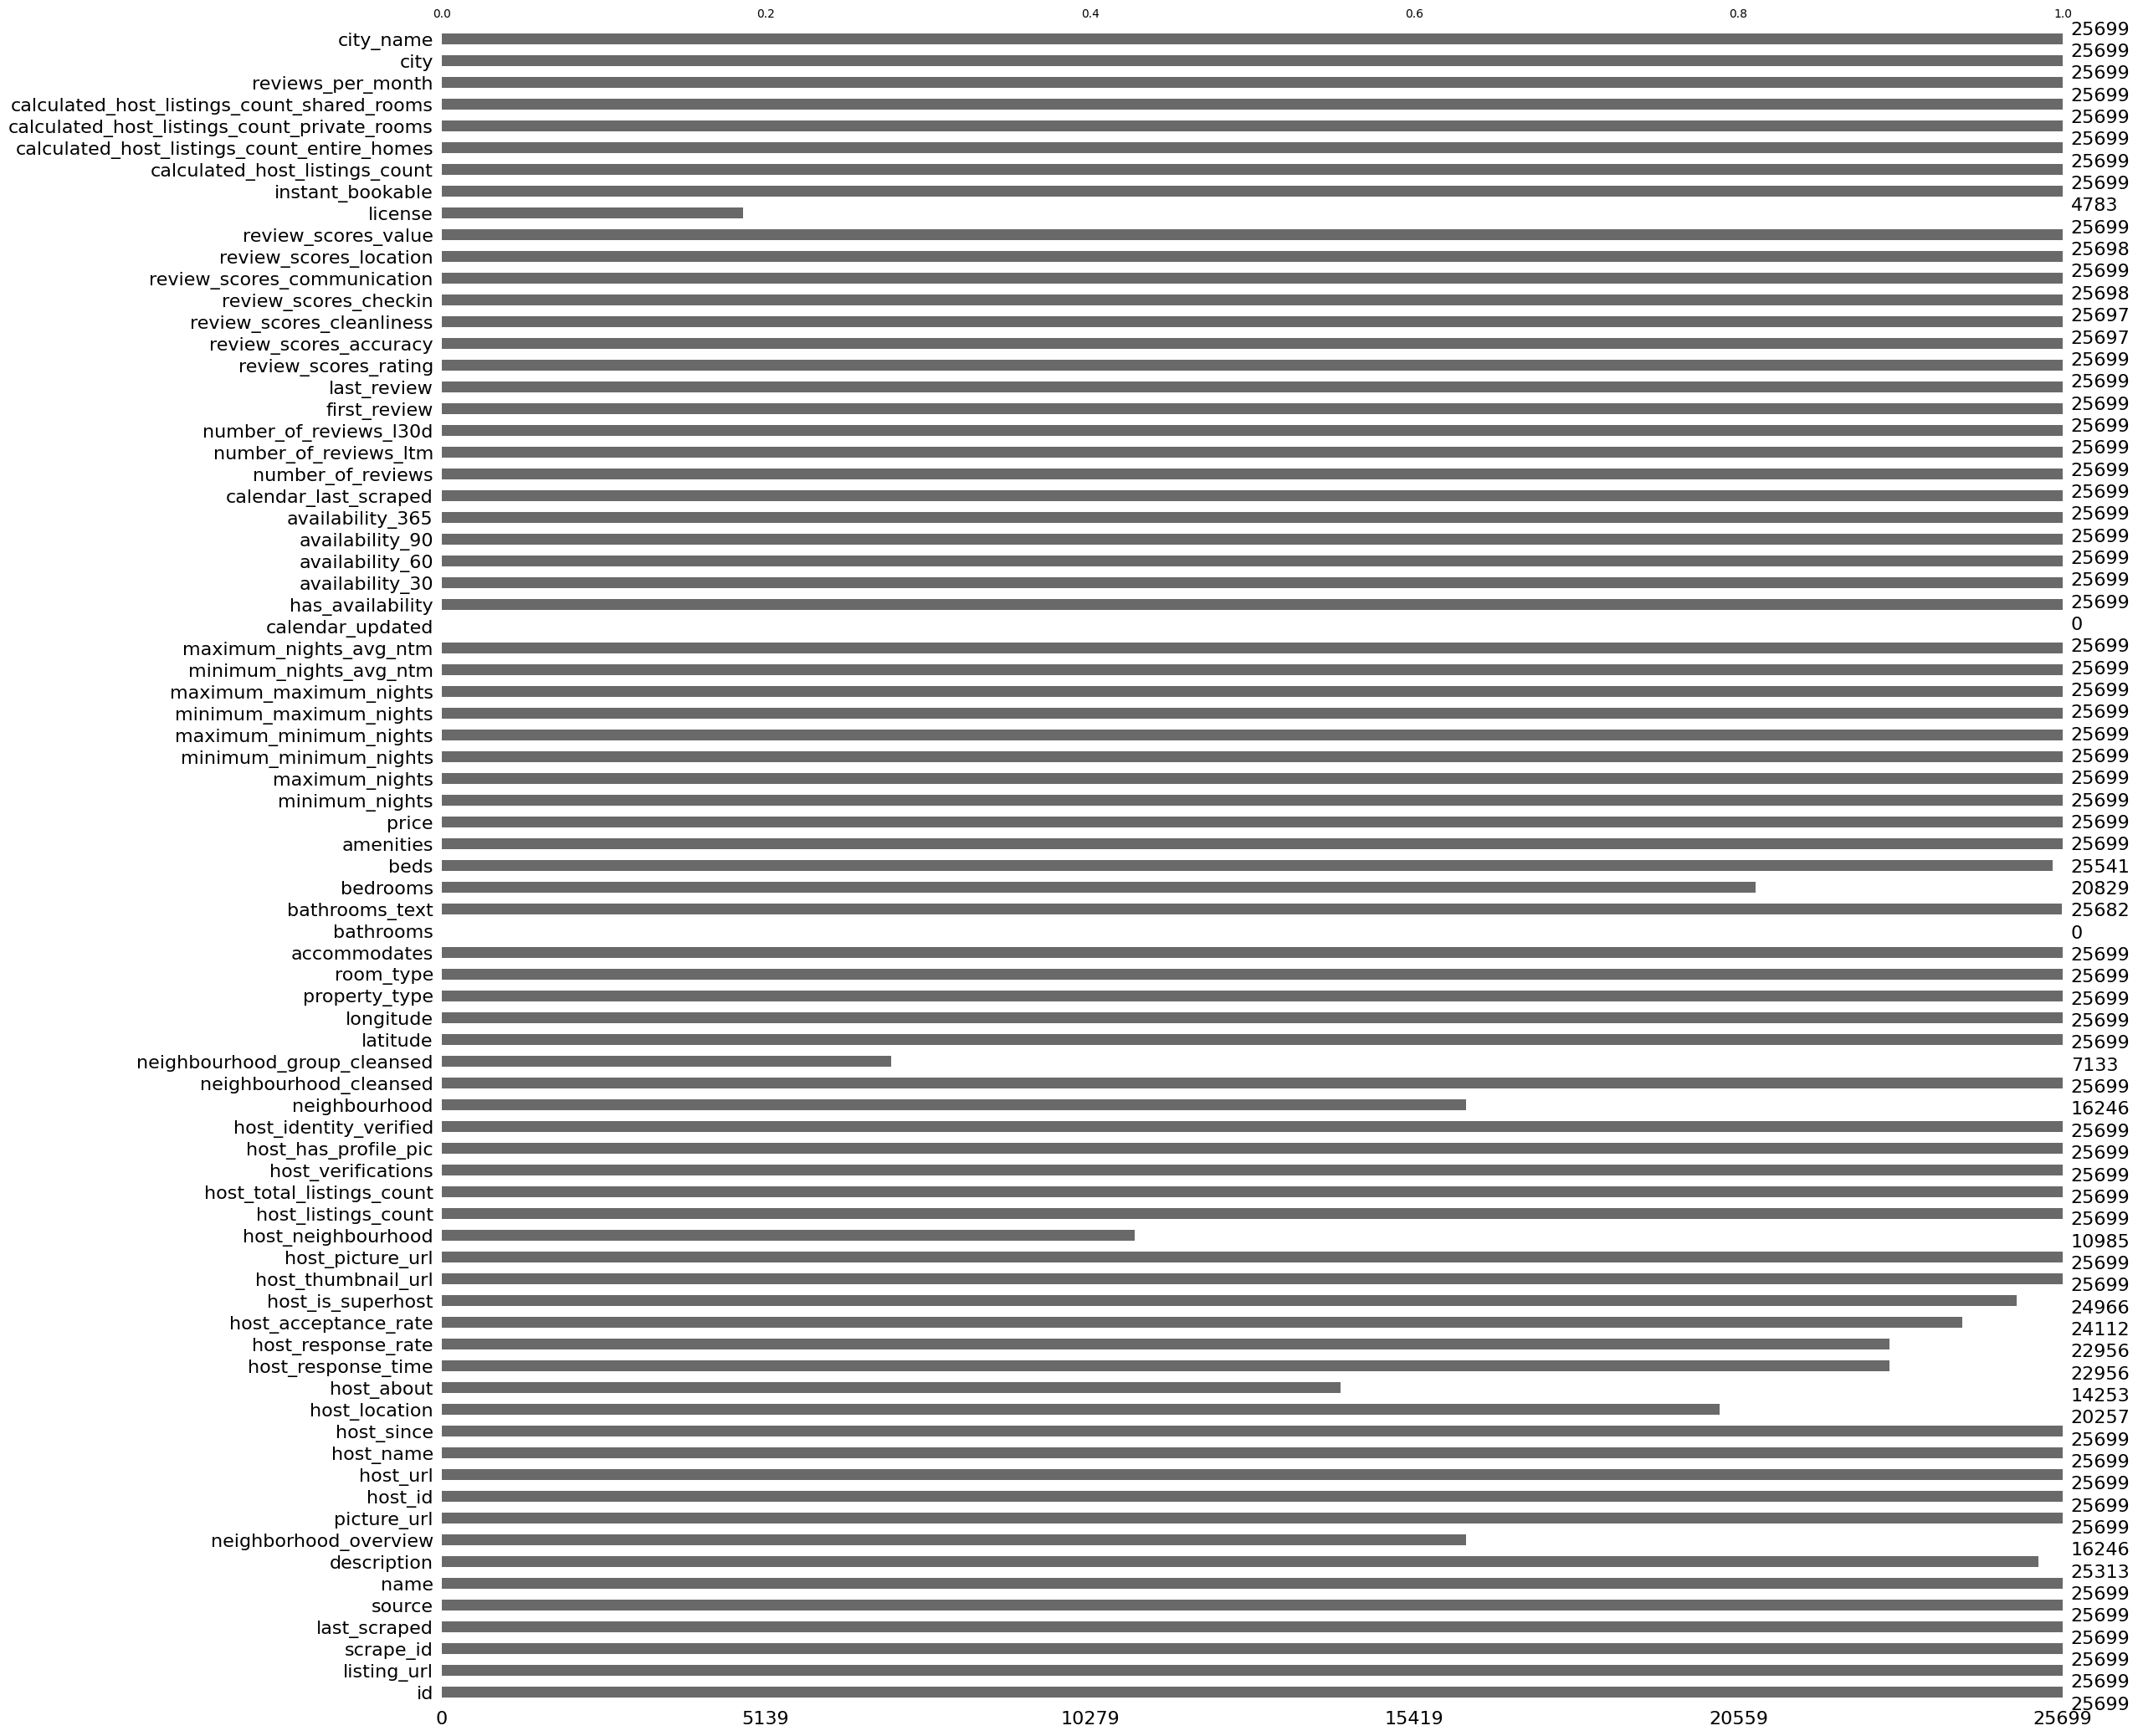

In [92]:
amenities_data.isnull().values.sum()

# column-wise summary of missing values
amenities_data.isna().sum()

msno.bar(amenities_data)

Remove the empty or extremely sparse data columns

In [93]:
amenities_data.drop('neighbourhood_group_cleansed', axis=1, inplace=True, errors='ignore')
amenities_data.drop('bathrooms', axis=1, inplace=True, errors='ignore')
amenities_data.drop('calendar_updated', axis=1, inplace=True, errors='ignore')
amenities_data.drop('license', axis=1, inplace=True, errors='ignore')

Get a random sample of the 'amentities' column to understand how to properly analyse:

In [94]:
random_row = consolidated_data.sample()
print(random_row['amenities'].values[0])
print(random_row['accommodates'].values[0]) # number of people
print(random_row['review_scores_rating'].values[0]) # from 0.0-5.0


["Microwave", "Dove shampoo", "Hair dryer", "Exercise equipment: free weights, yoga mat", "Dishes and silverware", "Iron", "Pets allowed", "Dove body soap", "Samsung Bluetooth sound system", "Shower gel", "Clothing storage: dresser", "Hot water", "Freezer", "Hangers", "Blender", "Baking sheet", "Free washer \u2013 In unit", "Paid crib - available upon request", "Dining table", "Self check-in", "Indesit stainless steel gas stove", "Cooking basics", "Oven", "Long term stays allowed", "Wine glasses", "Security cameras on property", "Paid parking on premises", "Free street parking", "AC - split type ductless system", "Paid parking garage off premises", "City skyline view", "Lockbox", "Refrigerator", "Hot water kettle", "Safe", "Books and reading material", "Central heating", "Bidet", "Room-darkening shades", "Essentials", "Kitchen", "Bathtub", "Mosquito net", "55\" HDTV with Amazon Prime Video, Chromecast, Disney+, Netflix, standard cable", "Dedicated workspace", "Wifi", "Private entrance"

In [95]:

missing_values_by_city = data.groupby('city_name').apply(lambda x: x.isnull().sum())
# Filtered columns - only show columns if one of the rows has missing values (greater than zero sum)
filtered_columns = missing_values_by_city.loc[:, (missing_values_by_city > 0).any()]

# Make it pretty
filtered_columns_table = tabulate(filtered_columns, headers='keys', tablefmt='fancy_grid', colalign=("center",), numalign="center", stralign="center")

#Get the columns with no null values:
null_counts = data.isnull().sum()

missing_values_by_city = data.groupby('city_name').apply(lambda x: x.isnull().sum())

# Only show column names where at least one row has missing values
filtered_columns = missing_values_by_city.loc[:, (missing_values_by_city > 0).any()]

# Express the missing values as a percentage
total_rows = data.shape[0]
null_percent = (filtered_columns / total_rows) * 100

missing_percent_by_city = null_percent.applymap(lambda x: f'{x:.2f}%')

# Print or display the result
mising_percent_table = tabulate(missing_percent_by_city, headers='keys', tablefmt='fancy_grid', colalign=("center",), numalign="center", stralign="center")



/var/folders/g6/jb0zpy7x489dnvz4_w69gxyc0000gn/T/ipykernel_2430/4106950855.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_city = data.groupby('city_name').apply(lambda x: x.isnull().sum())
/var/folders/g6/jb0zpy7x489dnvz4_w69gxyc0000gn/T/ipykernel_2430/4106950855.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_city = data.groupby('city_name').apply(lambda x: x.i

In [96]:
print("\nNumber of missing values in the provided dataset by column:")
print(filtered_columns_table)
print("\n Missing values by percent: \n", mising_percent_table)

print("The following columns are not missing any data:")
for column, count in null_counts.items():
    if count == 0:
        print(f'- {column}')


Number of missing values in the provided dataset by column:
╒═════════════╤═══════════════╤═════════════════════════╤═════════════════╤══════════════╤══════════════════════╤══════════════════════╤════════════════════════╤═════════════════════╤══════════════════════╤═════════════════╤════════════════════════════════╤═════════════╤══════════════════╤════════════╤════════╤════════════════════╤════════════════╤═══════════════╤════════════════════════╤══════════════════════════╤═════════════════════════════╤═════════════════════════╤═══════════════════════════════╤══════════════════════════╤═══════════════════════╤═══════════╤═════════════════════╕
│  city_name  │  description  │  neighborhood_overview  │  host_location  │  host_about  │  host_response_time  │  host_response_rate  │  host_acceptance_rate  │  host_is_superhost  │  host_neighbourhood  │  neighbourhood  │  neighbourhood_group_cleansed  │  bathrooms  │  bathrooms_text  │  bedrooms  │  beds  │  calendar_updated  │  first_review

### Get amenity counts:

In [97]:

from ast import literal_eval
amenities_data['amenities'] = amenities_data['amenities'].apply(literal_eval)

# Explode the 'amenities' column to get each individual amenity
exploded_amenities = amenities_data.explode('amenities')

amenities_type_count = exploded_amenities['amenities'].nunique()

# Get number of amenities per city:
unique_by_city = exploded_amenities.groupby('city_name')['amenities'].nunique()


# Get top-5 per city
amenities_type_counts = exploded_amenities.groupby(['city_name', 'amenities']).size().reset_index(name='count')
# Sort by counts in descending order within each city
amenities_counts_sorted = amenities_type_counts.sort_values(['city_name', 'count'], ascending=[True, False])

# Get the top 5 housing types for each borough
top_5_per_city = amenities_counts_sorted.groupby('city_name').head(5)
top5_table = tabulate(top_5_per_city, headers='keys', tablefmt='fancy_grid', colalign=("center",), numalign="center", stralign="center")


In [98]:
print(f"Number of unique amenity categories present in the dataset: {amenities_type_count} \n")
print(f'Number of unique amenities by city: \n {unique_by_city}')
print(top5_table)


Number of unique amenity categories present in the dataset: 4328 

Number of unique amenities by city: 
 city_name
Florence    2538
Naples      2177
Venice      1686
Name: amenities, dtype: int64
╒══════╤═════════════╤═════════════╤═════════╕
│      │  city_name  │  amenities  │  count  │
╞══════╪═════════════╪═════════════╪═════════╡
│ 991  │  Florence   │ Essentials  │  10017  │
├──────┼─────────────┼─────────────┼─────────┤
│ 1591 │  Florence   │ Hair dryer  │  9978   │
├──────┼─────────────┼─────────────┼─────────┤
│ 2471 │  Florence   │    Wifi     │  9543   │
├──────┼─────────────┼─────────────┼─────────┤
│ 1749 │  Florence   │   Kitchen   │  9482   │
├──────┼─────────────┼─────────────┼─────────┤
│ 1594 │  Florence   │   Hangers   │  9117   │
├──────┼─────────────┼─────────────┼─────────┤
│ 3893 │   Naples    │ Hair dryer  │  7144   │
├──────┼─────────────┼─────────────┼─────────┤
│ 3382 │   Naples    │ Essentials  │  6973   │
├──────┼─────────────┼─────────────┼─────────┤
│ 466

### Statistics for Review Scores

What is the available review score data?

In [99]:
review_columns = [col for col in amenities_data.columns if 'review' in col]

for col in review_columns:
    print(col)
   # print(amenities_data[col].values[0])

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month


There seem to be two categories of review scores: quantity-based (number of reviews) and value-based (rating, value, etc.)

In [100]:
print("\nData available for quantity of reviews:")

number_reviews = [col for col in amenities_data.columns if 'number' in col]
for col in number_reviews:
    print(col)

print("\nData available for reviews scores:")
review_scores = [col for col in amenities_data.columns if 'scores' in col]
for col in review_scores:
    print(col)



Data available for quantity of reviews:
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d

Data available for reviews scores:
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value


##### Quantity-based Review Data Available:

In [101]:
columns_to_describe = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']

# Group by 'city_name' and compute descriptive statistics
number_review_stats = amenities_data.groupby('city_name')[columns_to_describe].describe()

# Display information about the resulting DataFrame
#number_review_stats.info()

# Display overall descriptive statistics
#overall_stats = number_review_stats.describe(include="all")
formatted_stats = number_review_stats.apply(lambda x: x.map('{:,.2f}'.format) if x.name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] else x)

#Make it pretty
formatted_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean Review Score',
    'std': 'Standard Deviation',
    'min': 'Minimum Review Score',
    '25%': '25th Percentile',
    '50%': 'Median Review ScoreR',
    '75%': '75th Percentile',
    'max': 'Maximum Review Score'
}, inplace=True)

#Make it pretty
formatted_table = tabulate(formatted_stats, headers='keys', tablefmt='fancy_grid', colalign=("center",))
print(formatted_table)

╒═════════════╤══════════════════════════════════╤══════════════════════════════════════════════╤═══════════════════════════════════════════════╤═════════════════════════════════════════════════╤════════════════════════════════════════════╤═════════════════════════════════════════════════╤════════════════════════════════════════════╤═════════════════════════════════════════════════╤══════════════════════════════════════╤══════════════════════════════════════════════════╤═══════════════════════════════════════════════════╤═════════════════════════════════════════════════════╤════════════════════════════════════════════════╤═════════════════════════════════════════════════════╤════════════════════════════════════════════════╤═════════════════════════════════════════════════════╤═══════════════════════════════════════╤═══════════════════════════════════════════════════╤════════════════════════════════════════════════════╤══════════════════════════════════════════════════════╤═════════════

Conclusion: The data on the number of reviews available for each listing has categories for: the number of total reviews, reviews left in the last 12 months, and reviews from the last 30 days - all integer values. 

##### Value-based Review Data Available:

In [102]:
columns_to_diff = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
# Group by 'city_name' and compute descriptive statistics
#score_reviews = amenities_data.groupby('city_name')[columns_to_diff][''].describe()

for col in columns_to_diff:
    score_reviews = amenities_data.groupby('city_name')[col].describe()
    formatted_stats = score_reviews.apply(lambda x: x.map('{:,.2f}'.format) if x.name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] else x)

    #Make it pretty
    formatted_stats.rename(columns={
        'count': 'Count',
        'mean': 'Mean Review Score',
        'std': 'Standard Deviation',
        'min': 'Minimum Review Score',
        '25%': '25th Percentile',
        '50%': 'Median Review Score',
        '75%': '75th Percentile',
        'max': 'Maximum Review Score'
    }, inplace=True)

    #Make it pretty
    formatted_table = tabulate(formatted_stats, headers='keys', tablefmt='fancy_grid', colalign=("center",))
    print(formatted_table)


╒═════════════╤═════════╤═════════════════════╤══════════════════════╤════════════════════════╤═══════════════════╤═══════════════════════╤═══════════════════╤════════════════════════╕
│  city_name  │   Count │   Mean Review Score │   Standard Deviation │   Minimum Review Score │   25th Percentile │   Median Review Score │   75th Percentile │   Maximum Review Score │
╞═════════════╪═════════╪═════════════════════╪══════════════════════╪════════════════════════╪═══════════════════╪═══════════════════════╪═══════════════════╪════════════════════════╡
│  Florence   │   10774 │                4.71 │                 0.38 │                      1 │              4.62 │                  4.81 │              4.94 │                      5 │
├─────────────┼─────────┼─────────────────────┼──────────────────────┼────────────────────────┼───────────────────┼───────────────────────┼───────────────────┼────────────────────────┤
│   Naples    │    7792 │                4.7  │                 0.44 │     

The review score value and the review score rating seem like they may be the same thing? Verify if that is true.

In [103]:
amenities_data['score_difference'] = amenities_data['review_scores_value'] - amenities_data['review_scores_rating']
total_rows = amenities_data.shape[0]

# Filter rows where the difference is non-zero
different_rows = amenities_data[amenities_data['score_difference'] != 0]

# Display the rows with differences in a nice table format
columns_to_display = ['city_name', 'review_scores_value', 'review_scores_rating', 'score_difference']
formatted_table = tabulate(different_rows[columns_to_display], headers='keys', tablefmt='fancy_grid', colalign=("center",))

print(f"Count of rows with differences: {len(different_rows)} out of {total_rows}\n")
print(formatted_table)

Count of rows with differences: 19747 out of 25699

╒═══════╤═════════════╤═══════════════════════╤════════════════════════╤════════════════════╕
│       │ city_name   │   review_scores_value │   review_scores_rating │   score_difference │
╞═══════╪═════════════╪═══════════════════════╪════════════════════════╪════════════════════╡
│   0   │ Florence    │                  4.7  │                   4.65 │               0.05 │
├───────┼─────────────┼───────────────────────┼────────────────────────┼────────────────────┤
│   1   │ Florence    │                  4.65 │                   4.88 │              -0.23 │
├───────┼─────────────┼───────────────────────┼────────────────────────┼────────────────────┤
│   2   │ Florence    │                  4.82 │                   4.77 │               0.05 │
├───────┼─────────────┼───────────────────────┼────────────────────────┼────────────────────┤
│   3   │ Florence    │                  4.82 │                   4.84 │              -0.02 │
├───────

In [104]:
amenities_data.drop('score_difference', axis=1, inplace=True)


In [105]:
import random
random_row_index = random.choice(amenities_data.index)
print(amenities_data.head(0))
# Select the specified columns for the random row
random_row_values = amenities_data.loc[random_row_index, [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'review_scores_rating',
]]

# Print the values
print(f"Values from a random row (index {random_row_index}):")
print(random_row_values)


Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rati

Let's try to figure out how these scores relate to each other:

In [106]:
review_score_subcategories = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Calculate the total score for each row
total_review_score = amenities_data[review_score_subcategories].sum(axis=1)

# Calculate the average review score for each row
amenities_data['average_review_score'] = total_review_score / len(review_score_subcategories)


amenities_data['score_diff'] = amenities_data['average_review_score'] - amenities_data['review_scores_rating']
total_rows = amenities_data.shape[0]

# Filter rows where the difference is non-zero
different_rows = amenities_data[amenities_data['score_diff'] != 0]

# Display the rows with differences in a nice table format
columns_to_display = ['city_name', 'average_review_score', 'review_scores_rating', 'score_diff']
formatted_table = tabulate(different_rows[columns_to_display], headers='keys', tablefmt='fancy_grid', colalign=("center",))

print(f"Count of rows with differences: {len(different_rows)} out of {total_rows}\n")
print(formatted_table)
# Display the DataFrame with the new columns


Count of rows with differences: 23515 out of 25699

╒═══════╤═════════════╤════════════════════════╤════════════════════════╤══════════════╕
│       │ city_name   │   average_review_score │   review_scores_rating │   score_diff │
╞═══════╪═════════════╪════════════════════════╪════════════════════════╪══════════════╡
│   0   │ Florence    │                4.82667 │                   4.65 │  0.176667    │
├───────┼─────────────┼────────────────────────┼────────────────────────┼──────────────┤
│   1   │ Florence    │                4.80833 │                   4.88 │ -0.0716667   │
├───────┼─────────────┼────────────────────────┼────────────────────────┼──────────────┤
│   2   │ Florence    │                4.80833 │                   4.77 │  0.0383333   │
├───────┼─────────────┼────────────────────────┼────────────────────────┼──────────────┤
│   3   │ Florence    │                4.845   │                   4.84 │  0.005       │
├───────┼─────────────┼────────────────────────┼──────────

In [108]:
amenities_data.drop('score_diff', axis=1, inplace=True)
amenities_data.drop('average_review_score', axis=1, inplace=True)



KeyError: "['score_diff'] not found in axis"

Okay so we've learned that the review_scores_rating is not a average sum of all the other review values - they are independent.

From the Airbnb website: Ratings for hosts from 1 (worst) to 5 (best) for the overall experience and for specific categories, including: overall experience, cleanliness, accuracy, value, communication, check-in, and location.

review_scores_rating is a metric of the overall experience but not quanitfied by the other categories.

### Sales Price Stuff

In [ ]:
print(amenities_data.head(0))
listing_price_stats = data.groupby('city_name')['price'].describe()


#Make it $$ values
formatted_stats = listing_price_stats.apply(lambda x: x.map('${:,.2f}'.format) if x.name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] else x)

#Make it pretty
formatted_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean Listing Price',
    'std': 'Standard Deviation',
    'min': 'Minimum Listing Price',
    '25%': '25th Percentile',
    '50%': 'Median Listing Price',
    '75%': '75th Percentile',
    'max': 'Maximum Listing Price'
}, inplace=True)

#Make it pretty
formatted_table = tabulate(formatted_stats, headers='keys', tablefmt='fancy_grid', colalign=("center",))

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rati

In [111]:
amenities_data['price'] = pd.to_numeric(amenities_data['price'].replace('[\$,]', '', regex=True), errors='coerce')
price_comparison = amenities_data.groupby(['city_name', 'property_type'])['price'].describe()

#Make it $$ values
formatted_stats = price_comparison.apply(lambda x: x.map('${:,.2f}'.format) if x.name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] else x)

#Make it pretty
formatted_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean Listing Price',
    'std': 'Standard Deviation',
    'min': 'Minimum Listing Price',
    '25%': '25th Percentile',
    '50%': 'Median Listing Price',
    '75%': '75th Percentile',
    'max': 'Maximum Listing Price'
}, inplace=True)

#Make it pretty
formatted_table = tabulate(formatted_stats, headers='keys', tablefmt='fancy_grid', colalign=("center",))
print(formatted_table)

╒════════════════════════════════════════════════════╤═════════╤══════════════════════╤══════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════╤═══════════════════╤═════════════════════════╕
│                                                    │   Count │ Mean Listing Price   │ Standard Deviation   │ Minimum Listing Price   │ 25th Percentile   │ Median Listing Price   │ 75th Percentile   │ Maximum Listing Price   │
╞════════════════════════════════════════════════════╪═════════╪══════════════════════╪══════════════════════╪═════════════════════════╪═══════════════════╪════════════════════════╪═══════════════════╪═════════════════════════╡
│             ('Florence', 'Camper/RV')              │       3 │ $60.00               │ $17.44               │ $40.00                  │ $54.00            │ $68.00                 │ $70.00            │ $72.00                  │
├────────────────────────────────────────────────────┼─────────┼──────────────────────┼─

In [ ]:
amenities_data['price'] = pd.to_numeric(amenities_data['price'].replace('[\$,]', '', regex=True), errors='coerce')
price_comparison = amenities_data.groupby(['property_type'])['price'].describe()

#Make it $$ values
formatted_stats = price_comparison.apply(lambda x: x.map('${:,.2f}'.format) if x.name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max'] else x)

#Make it pretty
formatted_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean Listing Price',
    'std': 'Standard Deviation',
    'min': 'Minimum Listing Price',
    '25%': '25th Percentile',
    '50%': 'Median Listing Price',
    '75%': '75th Percentile',
    'max': 'Maximum Listing Price'
}, inplace=True)

#Make it pretty
formatted_table = tabulate(formatted_stats, headers='keys', tablefmt='fancy_grid', colalign=("center",))
print(formatted_table)

╒════════════════════════════════════╤═════════╤══════════════════════╤══════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════╤═══════════════════╤═════════════════════════╕
│           property_type            │   Count │ Mean Listing Price   │ Standard Deviation   │ Minimum Listing Price   │ 25th Percentile   │ Median Listing Price   │ 75th Percentile   │ Maximum Listing Price   │
╞════════════════════════════════════╪═════════╪══════════════════════╪══════════════════════╪═════════════════════════╪═══════════════════╪════════════════════════╪═══════════════════╪═════════════════════════╡
│                Boat                │       3 │ $525.00              │ $214.80              │ $280.00                 │ $447.00           │ $614.00                │ $647.50           │ $681.00                 │
├────────────────────────────────────┼─────────┼──────────────────────┼──────────────────────┼─────────────────────────┼───────────────────┼────────────

In [118]:
import plotly.express as px
amenities_graph = amenities_data['amenities']
print(amenities_data.head(0))
amenity_sums = amenities_graph.groupby(['price']).size().reset_index(name='COUNT')
amenity_sums['price'] = amenity_sums['price'].astype(str)

bar = px.bar(
    amenity_sums, 
    x='amenities', 
    y='COUNT', 
    barmode='group',
    title='Listing Price by Included Amenities and City'
)
bar.show()

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rati

KeyError: 'price'

### View the correlation between amenities (if one exists)

Need to do the one-hot encoding for the exploded amenities

In [126]:
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming you have a DataFrame named 'amenities_data' with a column 'amenities'

# Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(amenities_data['amenities']), columns=mlb.classes_, index=amenities_data.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
amenities_data_encoded = pd.concat([amenities_data, amenities_encoded], axis=1)

# Drop the original 'amenities' column
amenities_data_encoded.drop('amenities', axis=1, inplace=True)

# Print the resulting DataFrame with one-hot encoding
print(amenities_data_encoded.head())


      id                         listing_url       scrape_id last_scraped  \
0  31840  https://www.airbnb.com/rooms/31840  20230913045421   2023-09-13   
1  32120  https://www.airbnb.com/rooms/32120  20230913045421   2023-09-13   
2  32180  https://www.airbnb.com/rooms/32180  20230913045421   2023-09-13   
3  32395  https://www.airbnb.com/rooms/32395  20230913045421   2023-09-13   
4  39115  https://www.airbnb.com/rooms/39115  20230913045421   2023-09-13   

        source                                               name  \
0  city scrape  Serviced apartment in Florence · ★4.65 · 1 bed...   
1  city scrape  Rental unit in Florence · ★4.88 · 1 bedroom · ...   
2  city scrape  Condo in Florence · ★4.77 · 2 bedrooms · 4 bed...   
3  city scrape  Bed and breakfast in Florence · ★4.84 · 1 bedr...   
4  city scrape  Home in Florence · ★4.56 · 1 bedroom · 2 beds ...   

                                         description  \
0  Nice, private and quiet double room, classic s...   
1  Apartme

In [130]:

# Get the data types of each column
column_data_types = amenities_data.dtypes

# Identify non-numeric columns
non_numeric_columns = column_data_types[column_data_types != 'float64'].index.tolist()

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'instant_boo

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have a DataFrame named 'amenities_data'

# Drop non-numeric columns that are not correlation-able
non_numeric_columns = ['url', 'non_correlation_column1', 'non_correlation_column2', ...]  # List non-correlation-able columns
amenities_data_numeric = amenities_data.drop(non_numeric_columns, axis=1, errors='ignore')

# Drop rows with missing values (if needed)
amenities_data_numeric.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = amenities_data_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


ValueError: could not convert string to float: 'https://www.airbnb.com/rooms/39165'

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
filtered_data = filtered_data.corr(method = "pearson").round(2)
sns.heatmap(filtered_data, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(filtered_data, dtype=str)
annot_mask = filtered_data >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot heat map with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(filtered_data, annot=annot_labels, fmt='')

In [ ]:
#print(city_amenities_counts)